In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from pulser.devices import DigitalAnalogDevice

In [2]:
import src.register_optimizer as regop
import src.QAA as qaa
from src import qubo

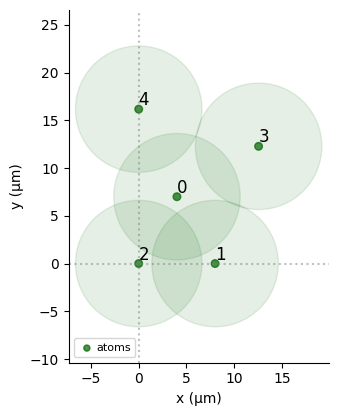

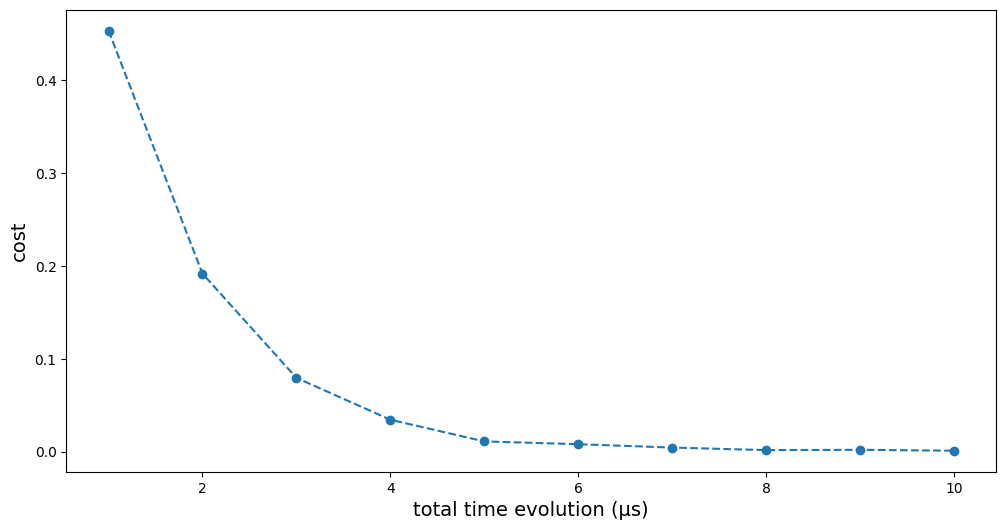

In [3]:
Q = np.array(
    [
        [-10.0, 19.7365809, 19.7365809, 5.42015853, 5.42015853],
        [19.7365809, -10.0, 20.67626392, 0.17675796, 0.85604541],
        [19.7365809, 20.67626392, -10.0, 0.85604541, 0.17675796],
        [5.42015853, 0.17675796, 0.85604541, -10.0, 0.32306662],
        [5.42015853, 0.85604541, 0.17675796, 0.32306662, -10.0],
    ]
)

reg = regop.optimized_register(Q)
regop.draw_register(reg)

sol = qubo.QUBO_solver(Q)
classical_cost = qubo.get_cost_colouring(sol, Q)

costs = []
for T in np.linspace(1000, 10000, 10):
    seq = qaa.adiabatic_sequence(Q, reg, T)
    counts = qaa.get_counts(seq)
    costs.append(1 - qubo.get_cost(counts, Q)/classical_cost)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), np.array(costs), "--o")
plt.xlabel("total time evolution (µs)", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.show()

In [4]:
seq = qaa.adiabatic_sequence(Q, reg, 4000)
counts = qaa.get_counts(seq)
#qaa.plot_distribution(counts)

[[-2.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1. -3.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1. -2.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0. -3.  1.  0.  1.  0.  0.]
 [ 0.  1.  0.  1. -4.  1.  0.  1.  0.]
 [ 0.  0.  1.  0.  1. -3.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0. -2.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  1. -3.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  1. -2.]]


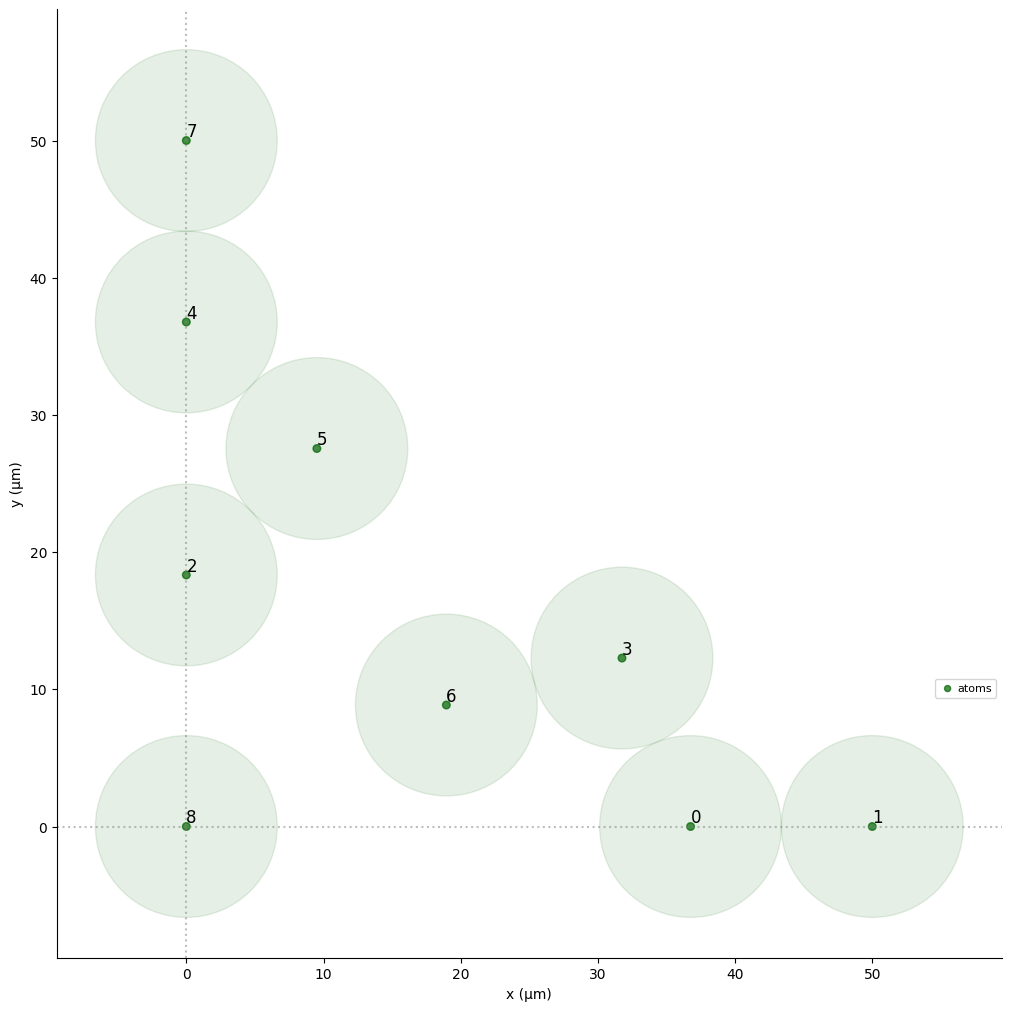

In [5]:
#square graph
from src import graphs

G = graphs.square_graph(3)
Q = qubo.QUBO_Q(G)
print(Q)
Q2 = np.copy(Q)
for i in range(len(Q)):
    Q2[i,i] = 0


sol = qubo.QUBO_solver(Q)
classical_cost = qubo.get_cost_colouring(sol, Q)

reg = regop.optimized_register(Q, 2412553)
regop.draw_register(reg)

seq = qaa.adiabatic_sequence(Q, reg, 4000)
counts = qaa.get_counts(seq)

[0.785, 0.4015714285714286, 0.12185714285714278, 0.08671428571428574, 0.11971428571428577, 0.13514285714285712, 0.14171428571428568, 0.13542857142857145, 0.1407142857142858, 0.132]


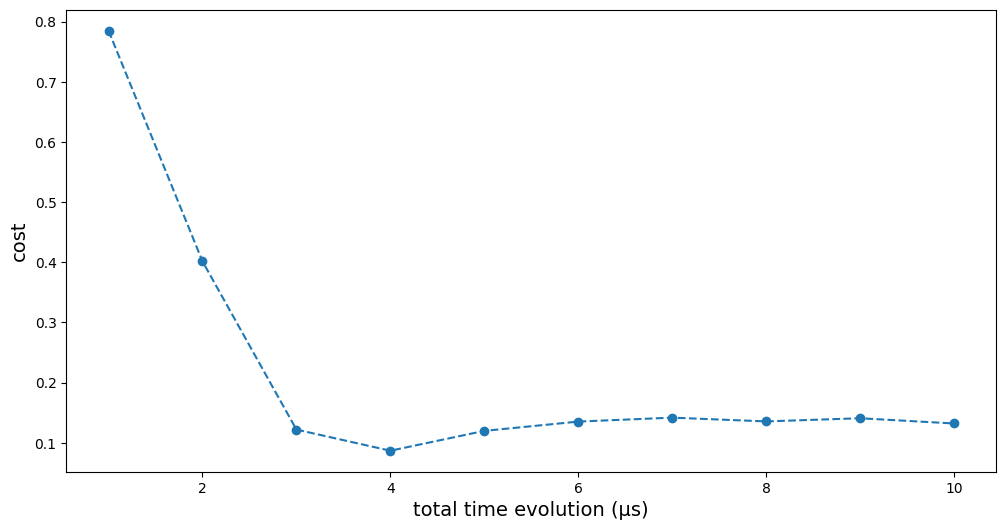

In [6]:
costs = []
for T in np.linspace(1000, 10000, 10):
    seq = qaa.adiabatic_sequence(Q, reg, T)
    counts = qaa.get_counts(seq)
    costs.append(1 - qubo.get_cost(counts, Q)/classical_cost)
print(costs)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), np.array(costs), "--o")
plt.xlabel("total time evolution (µs)", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.show()